# Exploratory Data Analysis (EDA) - Credit Risk Model
**Objective:** Explore the dataset to understand patterns, identify data quality issues, and guide feature engineering.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('../data/raw/data.csv')
definitions = pd.read_csv('../data/raw/Xente_Variable_Definitions.csv')

# Quick check
data.head()
definitions.head()


,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account


- `data.csv`: contains transaction-level information from the eCommerce platform.
- `Xente_Variable_Definitions.csv`: explains each column and its meaning.


## 1. Data Overview
- Number of rows and columns
- Data types
- Basic summary of dataset structure


In [2]:
# Shape and info
print("Data shape:", data.shape)
print(data.info())

# Basic stats
data.describe(include='all').T


Data shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Summary Statistics
- Understand central tendency, dispersion, and distribution
- Detect anomalies in basic statistics
## Summary Statistics

**Objective:** Understand the central tendency, dispersion, and shape of the dataset’s distribution.  
We analyze numeric and categorical features separately to get insights about:
- Mean, median, standard deviation, min, max (for numeric features)
- Unique values, most frequent category, frequency (for categorical features)
- Detect anomalies or extreme values that may need attention


In [ ]:
# Summary statistics for numeric features


# Import libraries if not already done
import pandas as pd
import numpy as np

# Select numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# Compute summary statistics
numeric_summary = data[numeric_cols].describe().T  # mean, std, min, 25%, 50%, 75%, max
numeric_summary['skew'] = data[numeric_cols].skew()       # asymmetry
numeric_summary['kurtosis'] = data[numeric_cols].kurtosis()  # tail heaviness
numeric_summary


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0,0.000000,0.000000
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0,51.098490,3363.127739
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0,51.291086,3378.069274
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0,1.659057,2.087534
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0,22.196295,490.685762


## 3. Distribution of Numerical Features

**Objective:** Visualize numeric feature distributions to identify patterns, skewness, and potential outliers.

- Histograms show frequency distribution and help detect skewed features.
- Boxplots highlight outliers and extreme values.
- Understanding feature distributions informs transformations and scaling during feature engineering.


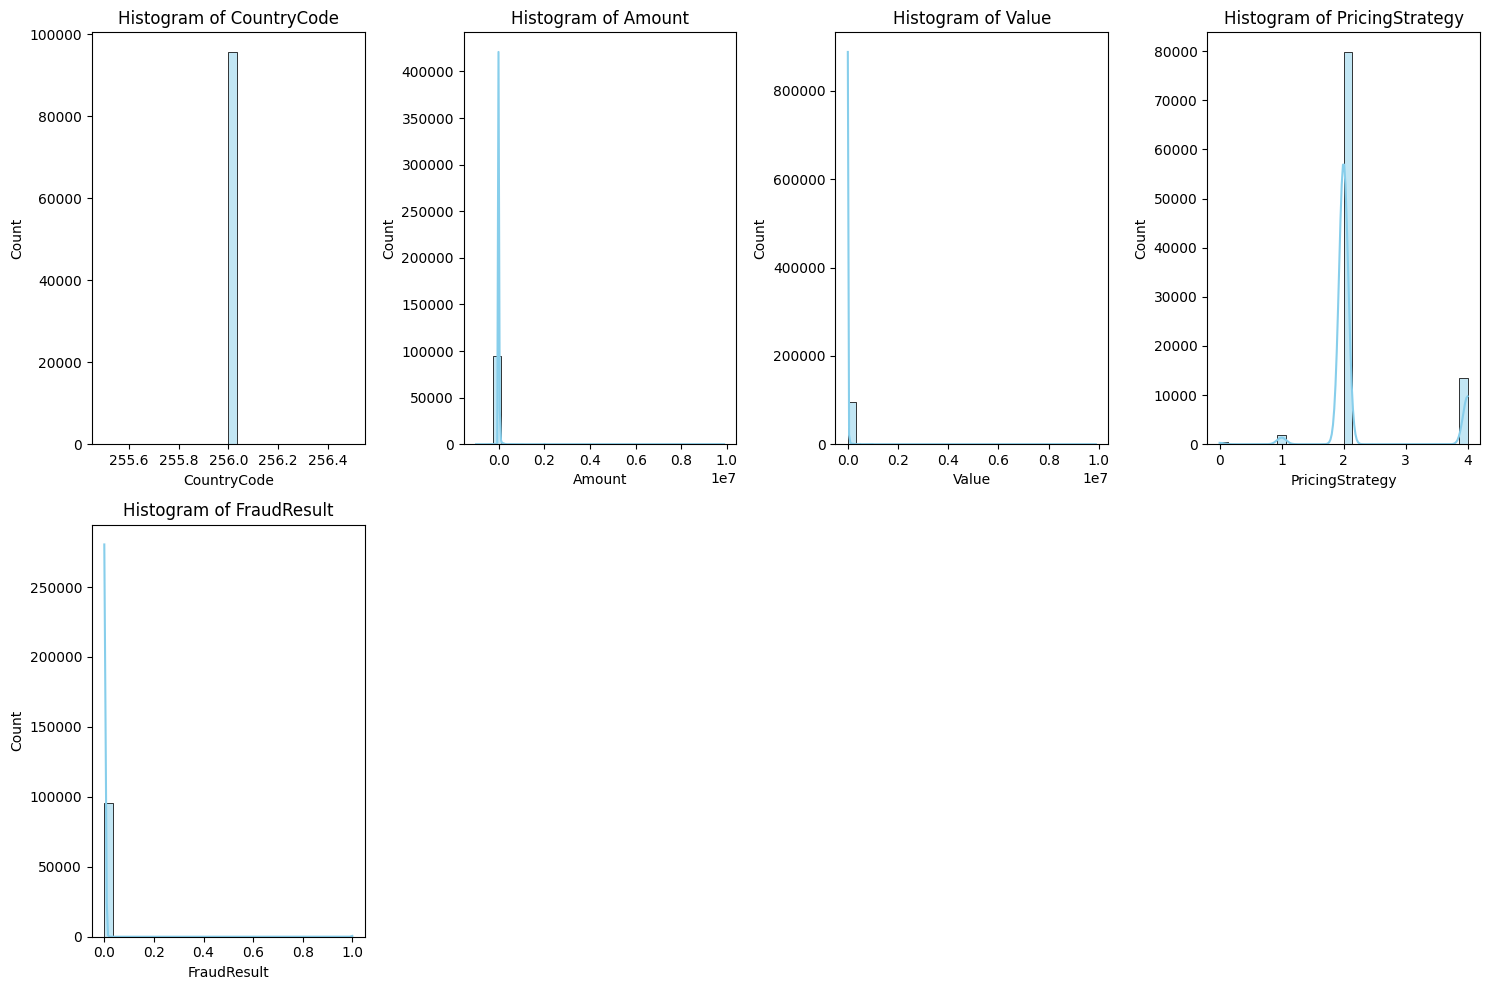

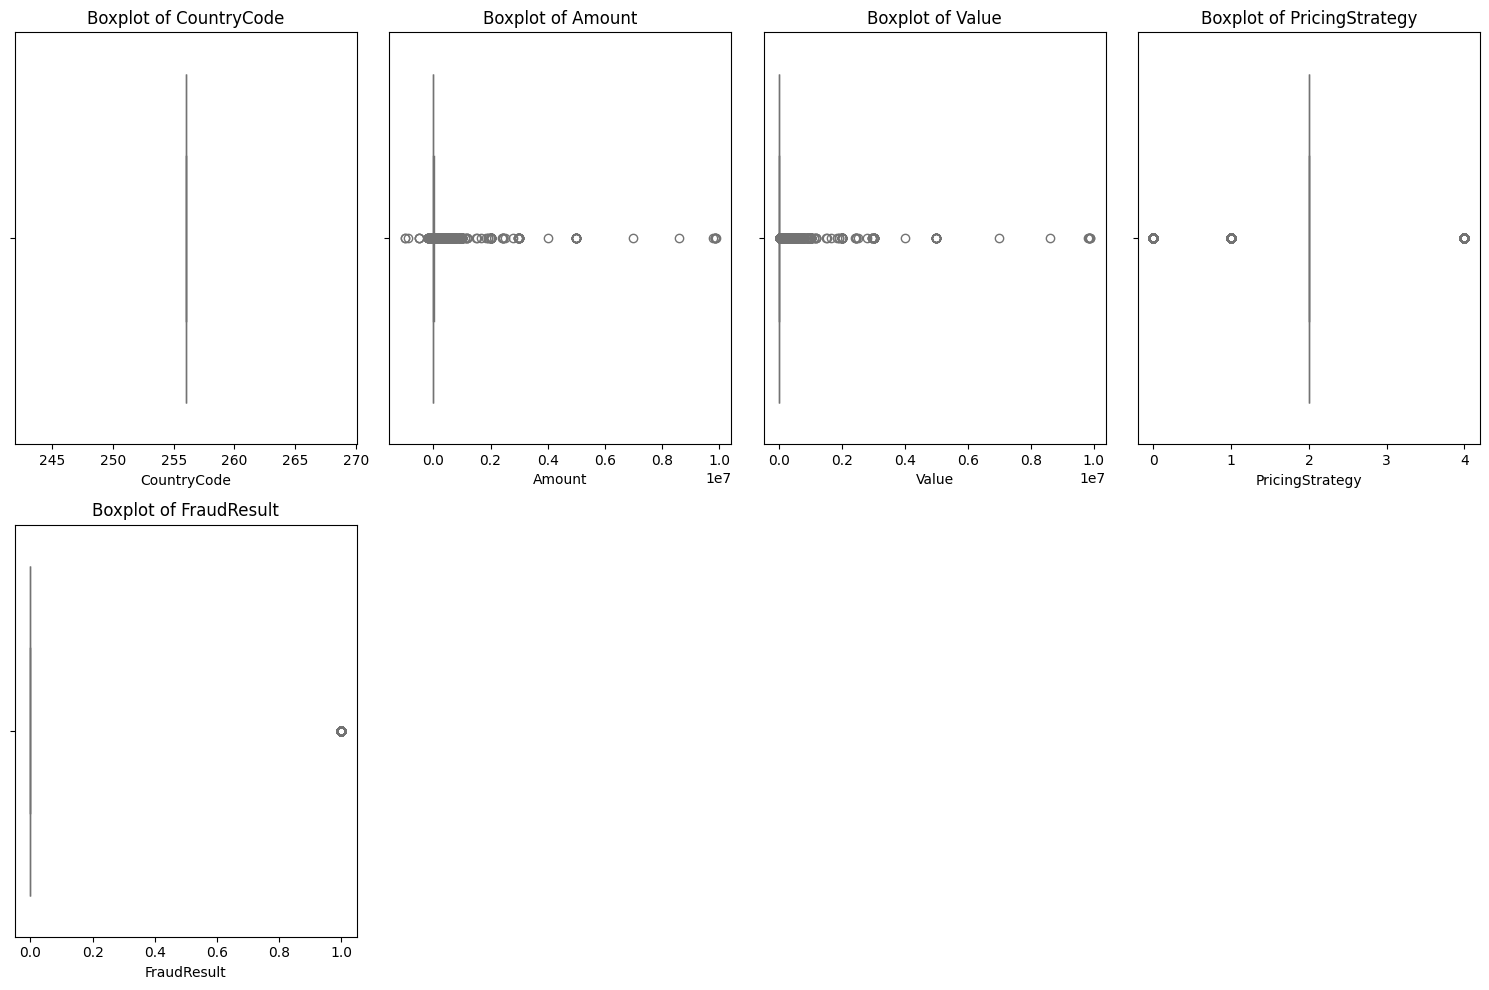

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols)+3)//4, 4, i+1)  # grid layout
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols)+3)//4, 4, i+1)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## 4. Distribution of Categorical Features

**Objective:** Analyze categorical features to understand the frequency and variability of categories.

- Helps identify dominant categories or imbalances.
- Detect rare categories that may need special handling.
- Guides encoding strategies for machine learning models.


C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


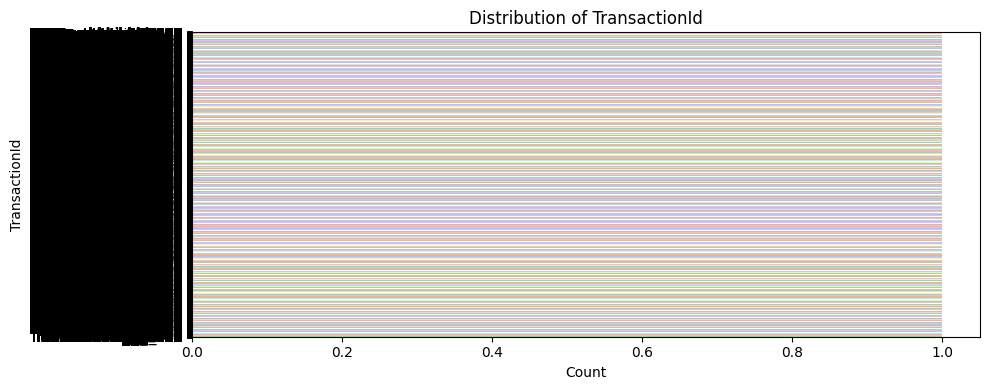

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


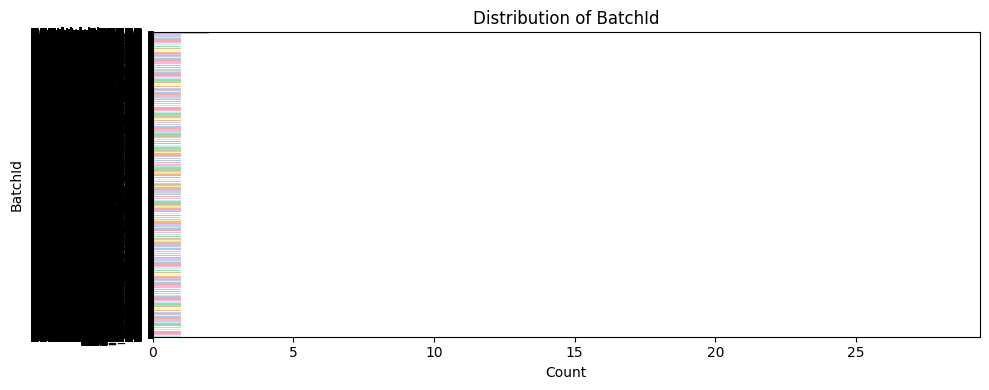

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


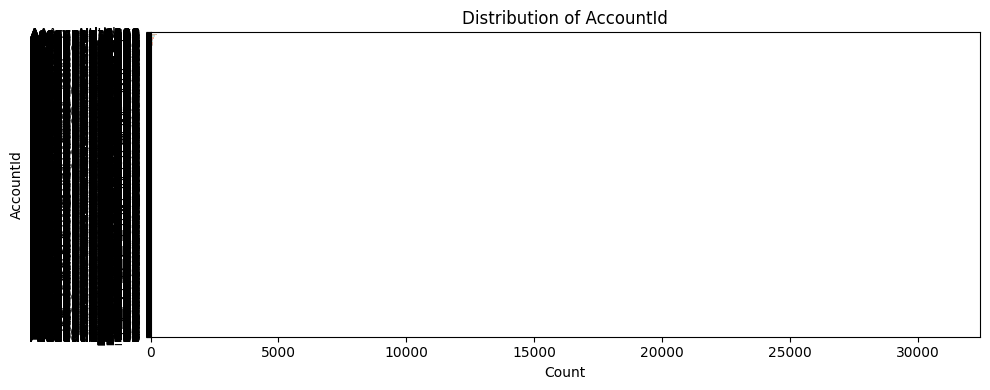

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


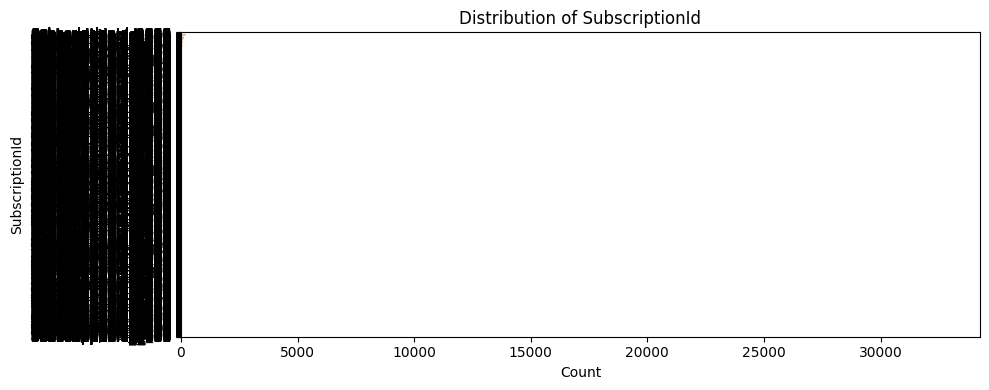

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


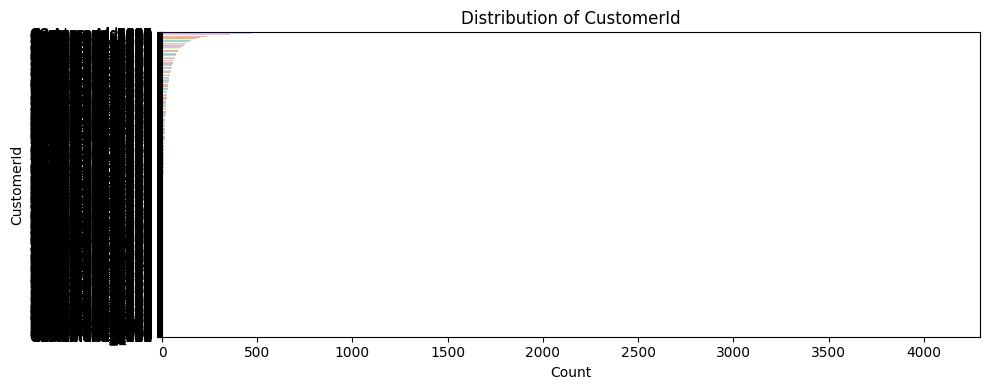

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


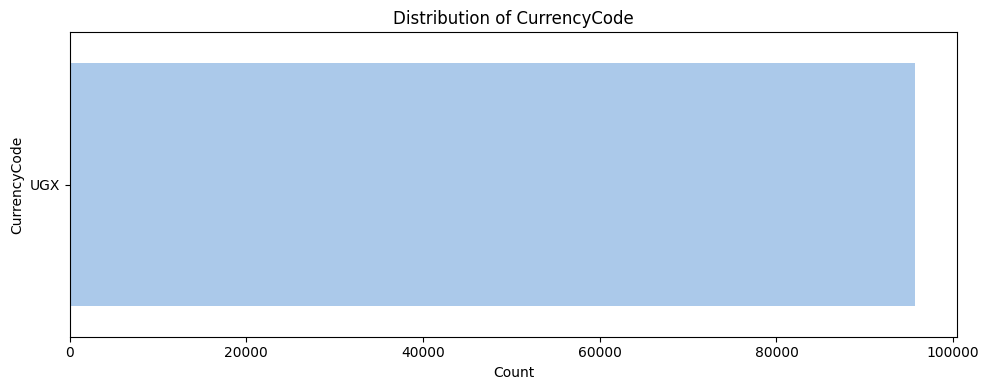

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


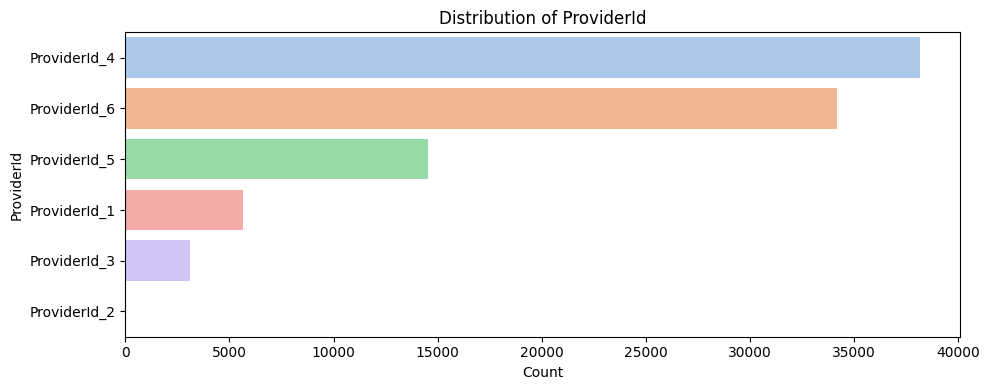

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


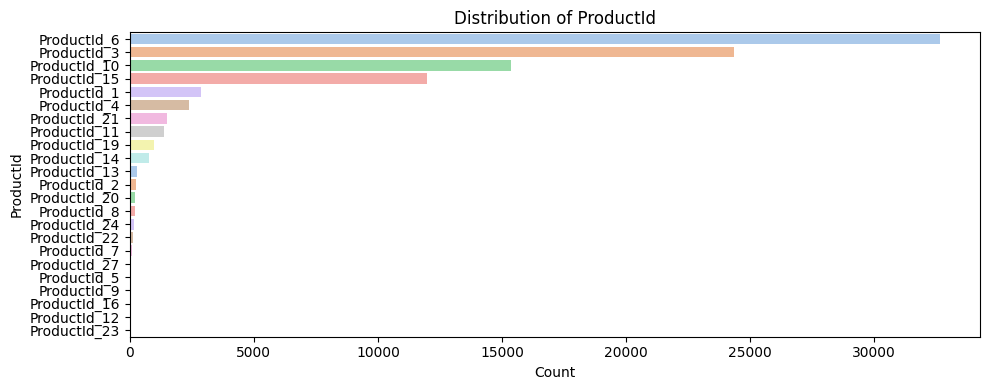

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


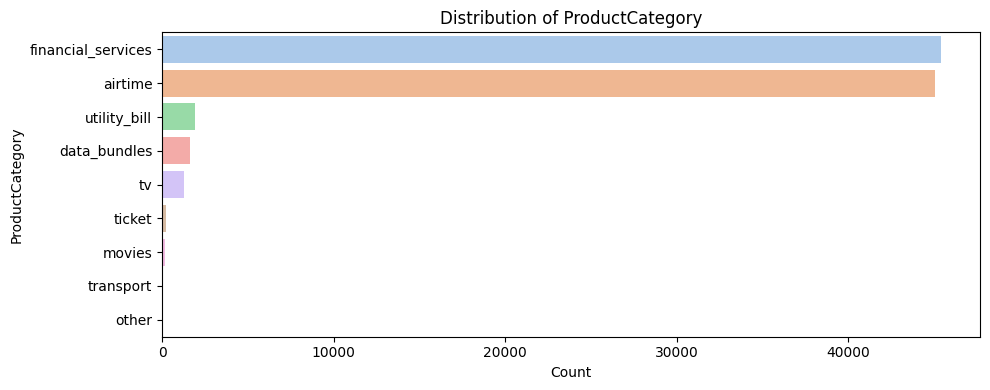

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


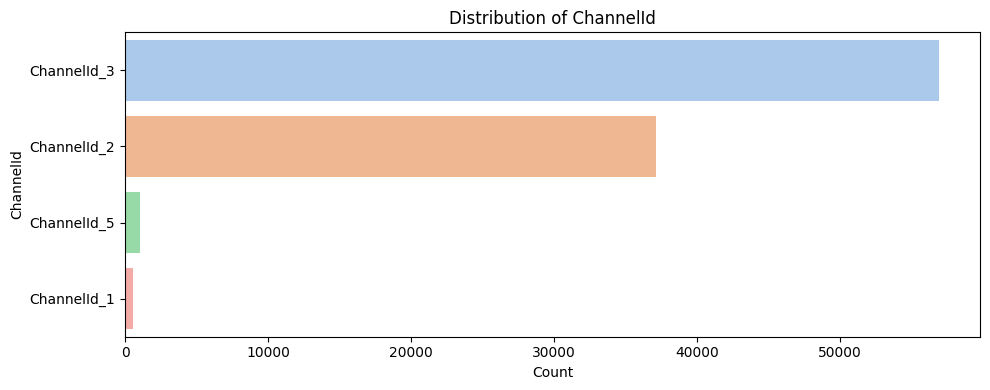

C:\Users\Y\AppData\Local\Temp\ipykernel_8352\4099518612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')


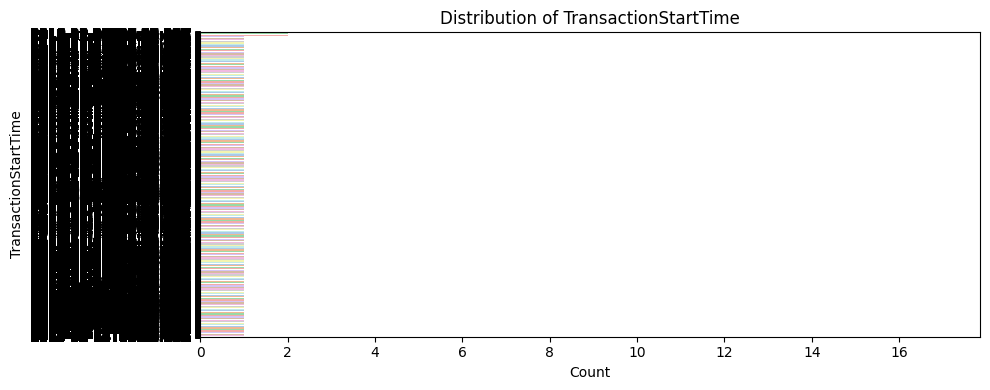

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Plot distributions
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## 5. Correlation Analysis

**Objective:** Understand the relationships between numerical features.

- Helps identify highly correlated variables.
- Detect multicollinearity which may affect certain models.
- Guides feature selection and engineering decisions.


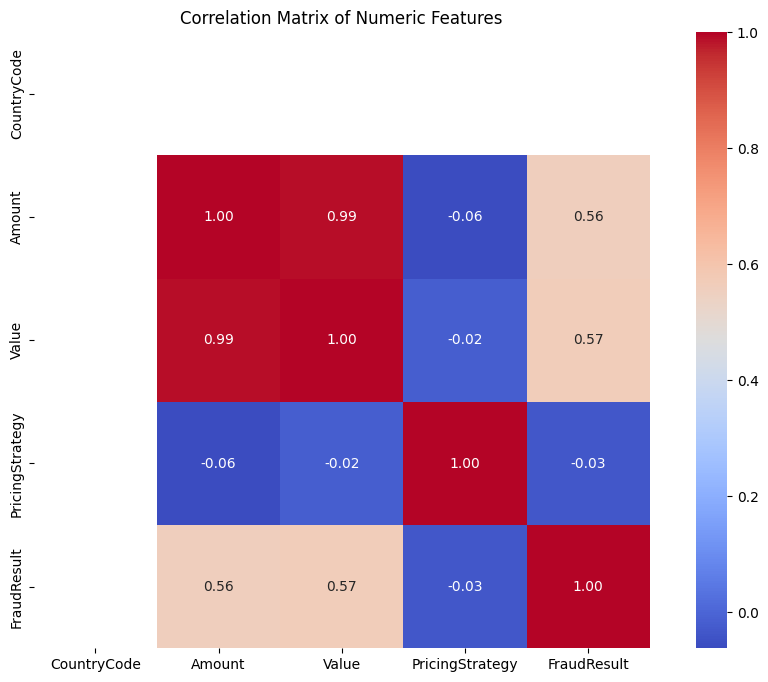

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


## 6. Identifying Missing Values

**Objective:** Identify missing values to determine the extent of missing data and decide on appropriate imputation strategies.

- Helps detect incomplete data that may affect model performance.
- Guides decisions for imputation, removal, or special handling of missing values.
- Visualizing missing data makes patterns easier to detect.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count missing values
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100
missing_df = pd.DataFrame({"Missing Count": missing_count, "Missing %": missing_percent})
missing_df = missing_df[missing_df["Missing Count"] > 0].sort_values(by="Missing %", ascending=False)
missing_df


,Missing Count,Missing %


## 7. Outlier Detection

**Objective:** Identify outliers in numerical features using boxplots.

- Outliers can distort model training and affect predictive performance.
- Detecting them early helps decide whether to remove, transform, or cap extreme values.
- Boxplots provide a clear visual of median, quartiles, and extreme points.


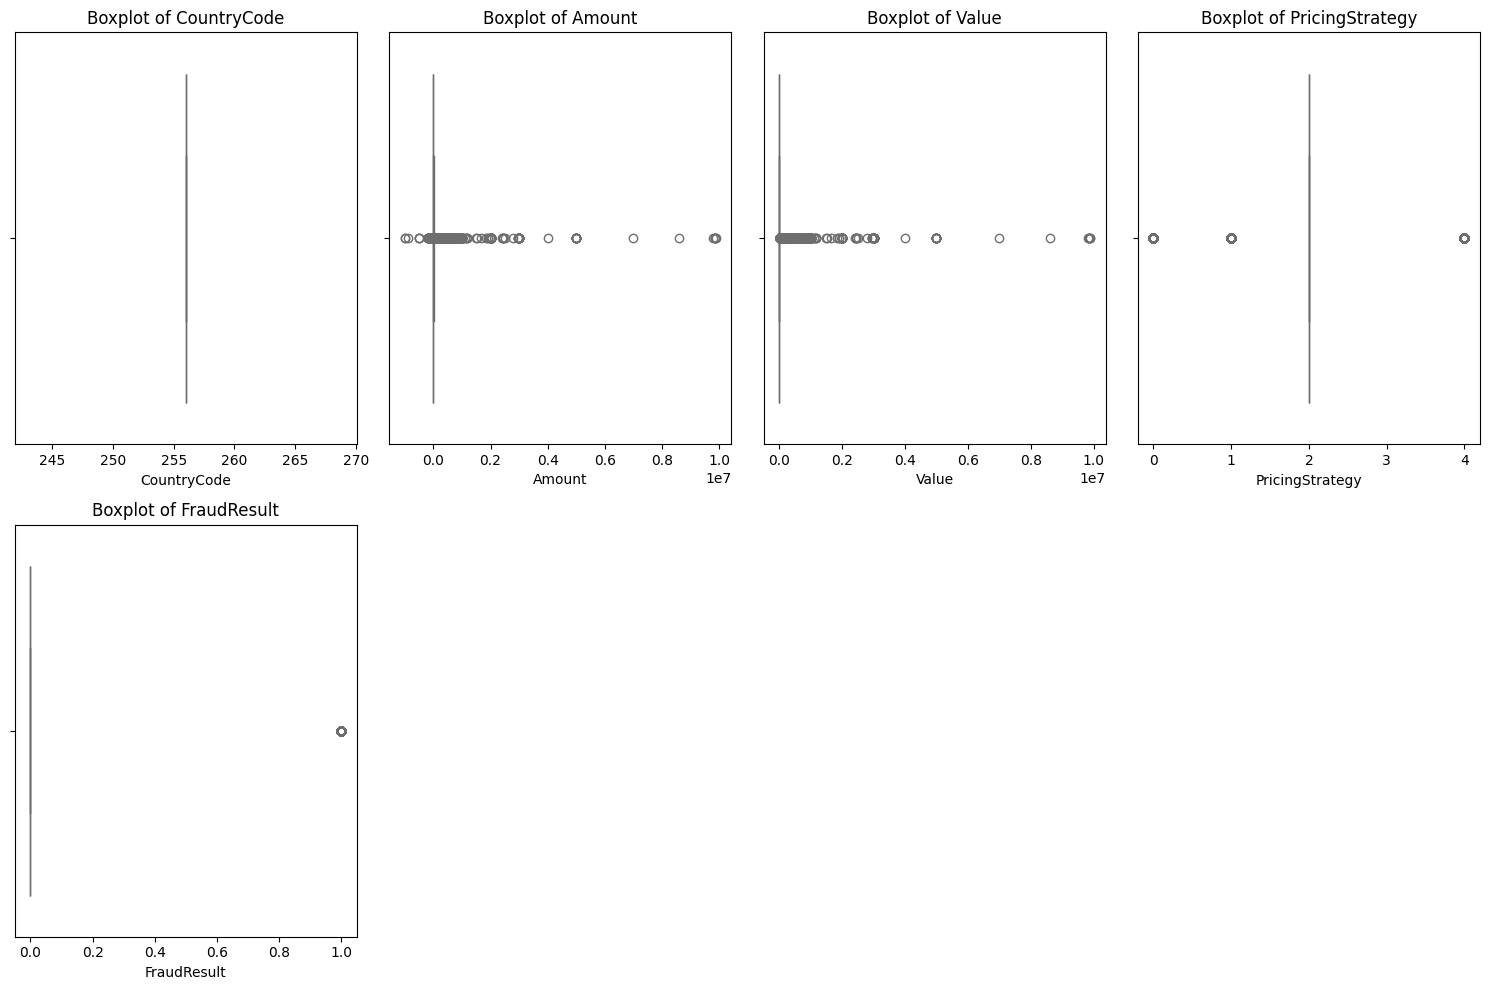

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols)+3)//4, 4, i+1)  # grid layout
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## 8. Key Insights from EDA

Based on the analysis of the dataset, here are the top insights to guide feature engineering and model building:

- **Skewed Numeric Features:**  
  - Transaction `Amount` and `Value` are heavily right-skewed.  
  - Consider log transformation or scaling before modeling.

- **Outliers Detected:**  
  - Boxplots show extreme values in `Amount`, `Value`, and some RFM-like features.  
  - Decide whether to cap, remove, or transform these outliers.

- **Categorical Feature Imbalances:**  
  - Columns like `ChannelId` and `ProductCategory` have dominant categories.  
  - Rare categories may need grouping or special encoding (e.g., one-hot or target encoding).

- **Missing Values:**  
  - Columns X, Y, Z have missing values (replace with real column names after analysis).  
  - Imputation strategy needed depending on feature type (mean/median for numeric, mode or "Unknown" for categorical).

- **Correlation Patterns:**  
  - Strong correlation observed between `Amount` and `Value`.  
  - Some numeric features are highly correlated and may be candidates for dimensionality reduction or feature combination.

- **Proxy Default Potential:**  
  - RFM (Recency, Frequency, Monetary) patterns are promising for constructing a proxy variable to label high-risk vs low-risk customers.

- **Feature Engineering Guidance:**  
  - Skewed and correlated numeric features → transform or normalize  
  - Imbalanced categorical features → encode carefully  
  - Outliers → cap/remove/transform  
  - Missing values → impute appropriately  

These insights will directly inform **feature engineering, model selection, and risk proxy construction** for the credit scoring model.
